In [1]:
%%html
<style>
table {align:left;display:block}  # to align html tables to left
</style>

In [2]:
# import libraries
from IPython.display import Image  # for displaying images in markdown cells
import pandas as pd  # Dataframe manipulation
import matplotlib.pyplot as plt  # Plot charts
import matplotlib.style as style  # Inherit styles
from matplotlib.pyplot import figure  # to adjust plot figure size
import numpy as np  # Arrays manipulation 
from numpy import mean, std  # mean, standard deviation

# Enables Jupyter to display graphs
%matplotlib inline

# Dataquest - Intermediate Statistics: Averages And Variability <br/> <br/> Project Title: Finding The Best Markets To Advertise In

## 1) Finding The Best Two Markets to Advertise In

#### Key skills applied in project:
- How to summarize distributions such as using the mean, and the median.
- How to measure the variability of a distribution such as using quartile ranges.
- Using various charts such as botplots and bar charts to visusalise distributions.
- Segmenting dataset by different variables to explore potential market segments considering a balance of different metrics
- Filtering data by identifying and removing outliers for further segmental analysis
- Retrieving, identify and print specified sections of JSON file to present metadata purposes

#### Background
Provided by: [Dataquest.io](https://www.dataquest.io/)

Let's assume that we're working for an an e-learning company that offers courses on programming. Most of our courses are on web and mobile development, but we also cover many other domains, like data science, game development, etc. We want to promote our product and we'd like to invest some money in advertisement. Our goal in this project is to find out the two best markets to advertise our product in.

## 2) Understanding the Data 
Provided by: [Dataquest.io](https://www.dataquest.io/)

To reach our goal, we could organize surveys for a couple of different markets to find out which would the best choices for advertising. This is very costly, however, and it's a good call to explore cheaper options first.

We can try to search existing data that might be relevant for our purpose. One good candidate is the data from [freeCodeCamp's 2017 New Coder Survey](https://medium.freecodecamp.org/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969). [freeCodeCamp](https://www.freecodecamp.org/) is a free e-learning platform that offers courses on web development. Because they run a [popular Medium publication](https://medium.freecodecamp.org/) (over 400,000 followers), their survey attracted new coders with varying interests (not only web development), which is ideal for the purpose of our analysis.



#### Metadata:
**2017-fCC-New-Coders-Survey-Data.csv**
- The survey data is publicly available in [this GitHub repository](https://github.com/freeCodeCamp/2017-new-coder-survey).
- Metadata details in [Json file here](https://raw.githubusercontent.com/freeCodeCamp/2017-new-coder-survey/master/clean-data/datapackage.json)

In [3]:
# Alternative way to present detailed metadata quickly
# Python program to read json file
import json

# Opening JSON file
with open('datapackage.json') as f:
    data = json.load(f)
    data_schema = data['resources'][0]['schema']['fields']
    
print(json.dumps(data_schema, indent=1))

[
 {
  "name": "Age",
  "title": "Age of Individual",
  "description": "The question asked was \"How old are you?\"",
  "type": "integer"
 },
 {
  "name": "AttendedBootcamp",
  "title": "Attended a Bootcamp",
  "description": "The question asked was \"Have you attended a full time coding bootcamp?\"",
  "type": "boolean"
 },
 {
  "name": "BootcampFinish",
  "title": "Finished a Bootcamp or Not",
  "description": "The question asked was \"Have you finished [your coding bootcamp]?\"",
  "type": "boolean"
 },
 {
  "name": "BootcampLoanYesNo",
  "title": "Bootcamp Loan Yes or No",
  "description": "The question asked was \"Did you take out a loan to pay for the bootcamp?\"",
  "type": "boolean"
 },
 {
  "name": "BootcampName",
  "title": "Bootcamp Name",
  "description": "The question asked was \"Which [coding bootcamp]?\"",
  "type": "string"
 },
 {
  "name": "BootcampRecommend",
  "title": "Bootcamp Recommendation",
  "description": "The question asked was \"Based on your experience, wou

In [4]:
# to review the variables more concisely
# also shorten the descriptions
print('Name', "|", 'Description', "|", "Data Type")
for row in data_schema:
    print(row['name'], "|", row['description'].replace("The question asked was ", ""), "|", row['type'])

Name | Description | Data Type
Age | "How old are you?" | integer
AttendedBootcamp | "Have you attended a full time coding bootcamp?" | boolean
BootcampFinish | "Have you finished [your coding bootcamp]?" | boolean
BootcampLoanYesNo | "Did you take out a loan to pay for the bootcamp?" | boolean
BootcampName | "Which [coding bootcamp]?" | string
BootcampRecommend | "Based on your experience, would you recommend this bootcamp to your friends?" | boolean
ChildrenNumber | "How many children do you have?" | integer
CityPopulation | "About how many people live in your city?" | string
CodeEventConferences | "If you have attended in-person-related events before, which ones have you found helpful?" | boolean
CodeEventDjangoGirls | "If you have attended in-person-related events before, which ones have you found helpful?" | boolean
CodeEventFCC | "If you have attended in-person-related events before, which ones have you found helpful?" | boolean
CodeEventGameJam | "If you have attended in-person-

In [5]:
# read and load df
df = pd.read_csv('2017-fCC-New-Coders-Survey-Data.txt', sep=',')

# review df
print(df.head())

# check rows and columns
print(df.shape)

    Age  AttendedBootcamp  BootcampFinish  BootcampLoanYesNo BootcampName  \
0  27.0               0.0             NaN                NaN          NaN   
1  34.0               0.0             NaN                NaN          NaN   
2  21.0               0.0             NaN                NaN          NaN   
3  26.0               0.0             NaN                NaN          NaN   
4  20.0               0.0             NaN                NaN          NaN   

   BootcampRecommend  ChildrenNumber                 CityPopulation  \
0                NaN             NaN            more than 1 million   
1                NaN             NaN              less than 100,000   
2                NaN             NaN            more than 1 million   
3                NaN             NaN  between 100,000 and 1 million   
4                NaN             NaN  between 100,000 and 1 million   

   CodeEventConferences  CodeEventDjangoGirls  ...  YouTubeFCC  \
0                   NaN                   Na

/Users/humphreytan/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3172: DtypeWarning: Columns (17,62) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


#### Findings (Understanding the data):
- **Observations:** 18,175 rows, **Attributes:** 136 columns
- Since we have ready-cleaned data as per the Github Repository, we have no further need to clean the data extensively, nor do we have to conduct a survey from scratch.
- We would try to limit our analysis on the relevant columns in the dataset:
  - **Recap from above objective:** *"Let's assume that we're working for an an e-learning company that offers courses on programming. Most of our courses are on web and mobile development, but we also cover many other domains, like data science, game development, etc. We want to promote our product and we'd like to invest some money in advertisement. Our goal in this project is to find out the two best markets to advertise our product in."*

## 3) Checking for Sample Representativity

Provided by: [Dataquest.io](https://www.dataquest.io/)

As we mentioned earlier, most of the courses we offer are on web and mobile development, but we also cover many other domains, like data science, game development, etc. For the purpose of our analysis, we want to answer questions about a population of new coders that are interested in the subjects we teach. We'd like to know:
- Where are these new coders located.
- What are the locations with the greatest number of new coders.
- How much money new coders are willing to spend on learning.

Before starting to analyze the sample data we have, we need to clarify whether it's representative for our population of interest and it has the right categories of people for our purpose.

In [6]:
# Analysing JobRoleInterest: for every participant the role(s) they'd be interested in working.
# Explore by generating a frequency table

# generate frequency table (expressed in percentages) for job roles
# sort them in descending order to get top results that we want
job_interest = pd.DataFrame(df['JobRoleInterest'].value_counts(normalize=True) * 100).sort_values(by='JobRoleInterest', axis=0, ascending=False)

# review transformation
job_interest

JobRoleInterest
Full-Stack Web Developer                                  11.770595
  Front-End Web Developer                                  6.435927
  Data Scientist                                           2.173913
Back-End Web Developer                                     2.030892
  Mobile Developer                                         1.673341
...                                                             ...
  User Experience Designer,   Mobile Developer,...         0.014302
  Mobile Developer,   User Experience Designer,...         0.014302
Data Engineer,   Mobile Developer,   Front-End ...         0.014302
Back-End Web Developer, Full-Stack Web Develope...         0.014302
Data Engineer,   Mobile Developer,   Product Ma...         0.014302

[3213 rows x 1 columns]

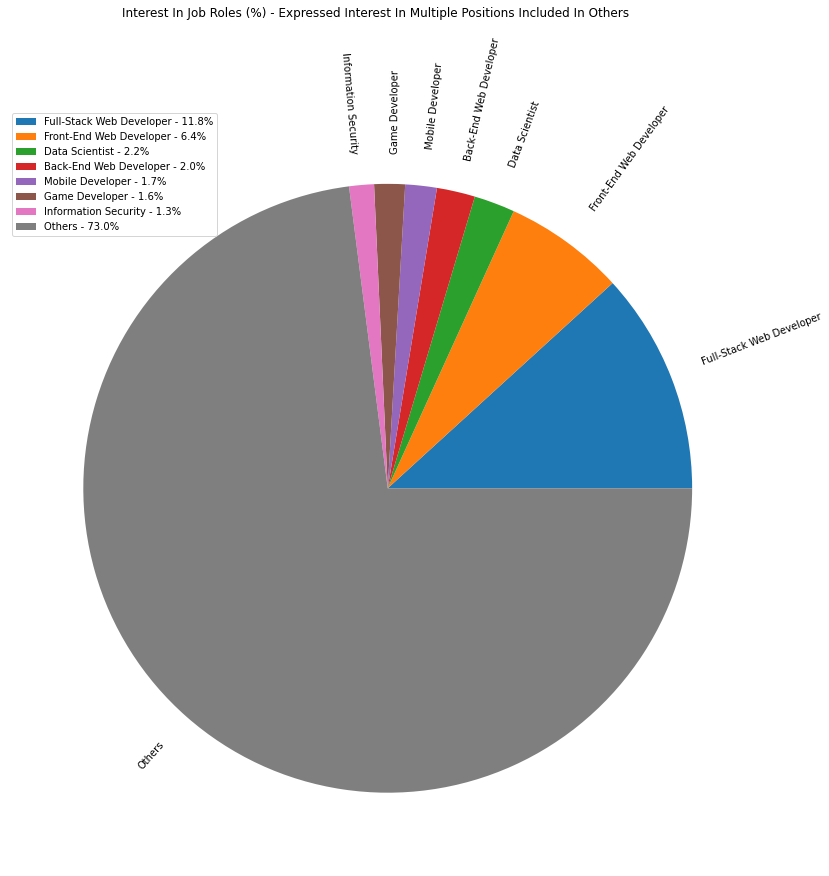

In [7]:
# Since there are so many categories, we are going to group categories with low values into 'Others'

job_interest_modified = job_interest[job_interest > 1].dropna()  # drop rows below 1 percent
others_percent = 100.0 - job_interest_modified.sum()  # get percentage of others categories
job_interest_modified.loc['Others'] = others_percent  # add new row to dataframe

# plot charts to visusalise for ease of review
job_interest_modified.plot.pie(subplots=True, figsize=(14,14),
                               #autopct='%.1f%%',
                               title='Interest In Job Roles (%) - Expressed Interest In Multiple Positions Included In Others', rotatelabels=True)

# create percentage text and display in legend,
# as alternate way to display percentages in piechart: autopct is too crowded
# source: https://stackoverflow.com/questions/23577505/how-to-avoid-overlapping-of-labels-autopct-in-a-matplotlib-pie-chart
# another way is to place manual labels but too much work for exploration stage in this project exercise
pct_text = job_interest_modified['JobRoleInterest'].round(decimals=1).astype(str)
legend_text = job_interest_modified.index.str.strip(' ') + " - " + pct_text + "%"  # .strip trims white space
plt.legend(legend_text)  # show specified legend text

plt.ylabel('')  # remove attribute label
plt.show()

In [8]:
# https://stackoverflow.com/questions/38943008/filtering-rows-containing-a-string-pattern-from-a-pandas-dataframe-index
# filter rows from dataframe index if it contains a certain string pattern

# 1) job_interest.index.str.lower()  extracts index from dataframe and turn it lowercase
# 2) .str.contains check if it contains a certain string pattern and returns bool array of True / False
# 3) job_interest[bool_array] filters in the rows that fits criteria
web_developer = job_interest[job_interest.index.str.lower().str.contains('web developer')]
mobile_developer = job_interest[job_interest.index.str.lower().str.contains('mobile developer')]

# check transformation
print(web_developer)
mobile_developer

                                                    JobRoleInterest
Full-Stack Web Developer                                  11.770595
  Front-End Web Developer                                  6.435927
Back-End Web Developer                                     2.030892
Full-Stack Web Developer,   Front-End Web Devel...         0.915332
  Front-End Web Developer, Full-Stack Web Devel...         0.800915
...                                                             ...
  User Experience Designer,   Mobile Developer,...         0.014302
  Mobile Developer,   User Experience Designer,...         0.014302
Data Engineer,   Mobile Developer,   Front-End ...         0.014302
Back-End Web Developer, Full-Stack Web Develope...         0.014302
Data Engineer,   Mobile Developer,   Product Ma...         0.014302

[2824 rows x 1 columns]


JobRoleInterest
  Mobile Developer                                         1.673341
Full-Stack Web Developer,   Mobile Developer               0.414760
  Front-End Web Developer,   Mobile Developer              0.257437
  Mobile Developer, Game Developer                         0.228833
  Mobile Developer,   Front-End Web Developer              0.214531
...                                                             ...
  User Experience Designer,   Mobile Developer,...         0.014302
  Mobile Developer,   User Experience Designer,...         0.014302
Data Engineer,   Mobile Developer,   Front-End ...         0.014302
Back-End Web Developer, Full-Stack Web Develope...         0.014302
Data Engineer,   Mobile Developer,   Product Ma...         0.014302

[1654 rows x 1 columns]

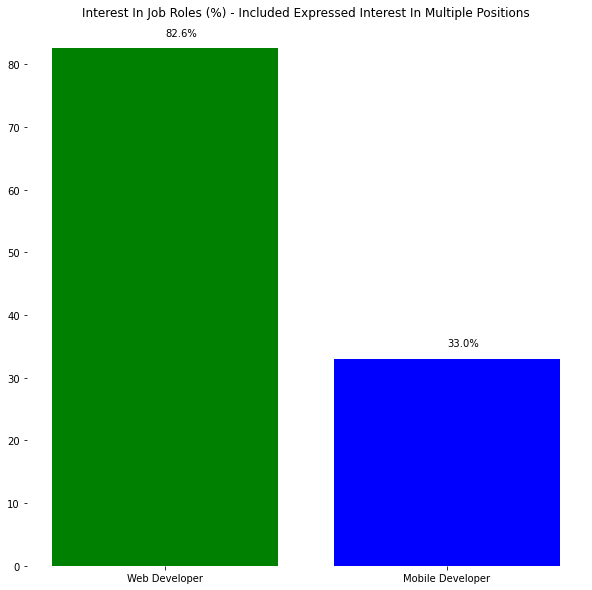

In [9]:
# return total percentage for each segment
pct_web = round(web_developer.sum(),1)
pct_mobile = round(mobile_developer.sum(),1)

# plot charts to illustrate percentages of each segment

fig, ax = plt.subplots(nrows=1, figsize =(10,10))
fig = (20,20)

ax.bar(x=1, height=pct_web, color='Green')
ax.bar(x=2, height=pct_mobile, color='Blue')
ax.set_xticks([1, 2])
ax.set_xticklabels(['Web Developer', 'Mobile Developer'])

# display value above each bar plots
ax.text(1, pct_web + 2, str(pct_web[0]) + '%')  # matplotlib.pyplot.text(x, y, s,); x,y = coordinates, s = string to display
ax.text(2, pct_mobile + 2, str(pct_mobile[0]) + '%')  # matplotlib.pyplot.text(x, y, s,); x,y = coordinates, s = string to display

# Hide the spines as too crowded
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# title
plt.title('Interest In Job Roles (%) - Included Expressed Interest In Multiple Positions')

plt.show()

#### Findings (Checking for Sample Representativity):
**From our review of the dataset:**
- People can be interested in one or more subjects
- Since there may be signficant proportion interested in one or more subjects, further data cleaning may be necessary if more accurate results are desired to properly represent the population
- There are significant interests from job seekers in web and mobile development (refer below), which is relevant as most of the courses we offer are on web and mobile development

**Interest In Job Roles (%) - Expressed Interest In Multiple Positions Included In Others (Top 5):**
- Full-Stack Web Developer: 11.8%
- Front-End Web Developer: 6.4%
- Data Scientist: 2.2%
- Back-End Web Developer: 2.0%
- Mobile Developer: 1.7%

**Interest In Job Roles (%) - Included Expressed Interest In Multiple Positions**
- Web Developer: 82.6%
- Mobile Developer: 33.0%

## 4) New Coders - Locations and Densities

Provided by: [Dataquest.io](https://www.dataquest.io/)

Now that we found out that the sample has the right categories of people for our purpose, we can begin analyzing it. We can start with finding out where these new coders are located, and what are the densities (how many coders there are) for each location.

The data set provides information about the location of each participant at a country level. The **CountryCitizen** variable describes the country of origin for each participant, and the **CountryLive** variable describes what country each participants lives in (which may be different than the origin country).

For our analysis, we'll work with the **CountryLive** variable because we're interested where people actually live at the moment when we run the ads. In other words, we're interested where people are located, not where they were born.

Because the data set provides information at a country level, we can think of each country as an individual market. This means we can frame our goal as finding the two best countries to advertise in.

One indicator of a good market is the number of potential customers — the more potential customers in a market, the better. If our ads manage to convince 10% of the 5000 potential customers in market A to buy our product, then this is better than convincing 100% of the 30 potential customers in market B.

In [10]:
# Drop all rows where no response for job role interest (ie. NaN)
# Extract relevant column - 'CountryLive' for analysis only
df_country = df[df['JobRoleInterest'].notna()]['CountryLive']

# check transformation
print(type(df_country))
df_country

<class 'pandas.core.series.Series'>


1        United States of America
2        United States of America
3                          Brazil
4                        Portugal
6                  United Kingdom
                   ...           
18161          Republic of Serbia
18162                 Philippines
18163    United States of America
18171                     Nigeria
18174              United Kingdom
Name: CountryLive, Length: 6992, dtype: object

In [11]:
# generate both absolute and relative frequencies

# absolute frequency
country_freq = df_country.value_counts()

# relative frequency
country_pct = country_freq / country_freq.sum() * 100

# return total top 5 in frequency tables
country_freq_top_5 = country_freq[:5]
country_pct_top_5 = round(country_pct[:5],1)

print('Countries Lived In By New Coders  - Top 5 (Frequency Table - By Count)')
print('----------------------------------------------------------------------')
print(country_freq_top_5)
print('')
print('======================================================================')
print('Countries Lived In By New Coders- Top 5 (Frequency Table - By %)')
print('----------------------------------------------------------------------')
print(country_pct_top_5)

Countries Lived In By New Coders  - Top 5 (Frequency Table - By Count)
----------------------------------------------------------------------
United States of America    3125
India                        528
United Kingdom               315
Canada                       260
Poland                       131
Name: CountryLive, dtype: int64

Countries Lived In By New Coders- Top 5 (Frequency Table - By %)
----------------------------------------------------------------------
United States of America    45.7
India                        7.7
United Kingdom               4.6
Canada                       3.8
Poland                       1.9
Name: CountryLive, dtype: float64


#### Findings (New Coders - Locations and Densities):
- Top 5 Countries Lived In By New Coders per above in terms of market size potential for approaching new coders: **USA, India, UK, Canada, Poland**

## 5) Spending Money For Learning

Provided by: [Dataquest.io](https://www.dataquest.io/)

Previously, we found useful information about the location of new coders, and what are the countries where new coders live, but we need to go more in depth with our analysis before taking a decision. We can continue by figuring out how much money new coders are actually willing to spend on learning. Advertising within markets where most people are only willing to learn for free is extremely unlikely to be profitable for us.

The **MoneyForLearning** column describes in American dollars the amount of money spent by participants from the moment they started coding until the moment they completed the survey. Our company sells subscriptions at a price of $59 per month, and for this reason we're interested in finding out how much money each student spends per month.

It also seems like a good idea to narrow down our analysis to only four countries: the **US, India, the United Kingdom, and Canada**. Two reasons for this decision are:
- These are the countries having the highest absolute frequencies in our sample, which means we have a decent amount of data for each.
- Our courses are written in English, and English is an official language in all these four countries. The more people that know English, the better our chances to target the right people with our ads.


In [12]:
# To analyse spending:
# Create new attribute: Monthly spending = 'MoneyForLearning' / 'Months Programming'

# first, review months programming column
print(df['MonthsProgramming'].value_counts().sort_index())
print('=================================================')

# from output - we can see there are survey responses with '0' months spent on programming, they may have just started.
# let's replace these numbers with 1 instead for further analysis
df.loc[df['MonthsProgramming'] == 0, 'MonthsProgramming'] = 1

# check transformation
print(df['MonthsProgramming'].value_counts().sort_index())

# after-checking: success!

0.0       578
1.0      1697
2.0      1338
3.0      1333
4.0       732
         ... 
572.0       1
600.0       2
720.0       1
743.0       2
744.0      12
Name: MonthsProgramming, Length: 154, dtype: int64
1.0      2275
2.0      1338
3.0      1333
4.0       732
5.0       621
         ... 
572.0       1
600.0       2
720.0       1
743.0       2
744.0      12
Name: MonthsProgramming, Length: 153, dtype: int64


In [13]:
# Continuing from above cell: create new attribute
# also drop any null values
# also drop any rows where spending = 0
df['mthly_spending'] = df['MoneyForLearning'] / df['MonthsProgramming']
mthly_spending = df.loc[df['mthly_spending'].notna(), ['CountryLive', 'mthly_spending']]  # keep the selected 2 columns using .loc
mthly_spending = mthly_spending[mthly_spending['mthly_spending'] != 0]  # filter out where monthly spending is 0

# filter select the countries we are interested in
# US, India, UK, Canada
mthly_spending = mthly_spending[mthly_spending['CountryLive'].isin(['United States of America', 'India', 'United Kingdom', 'Canada'])]

# groupby: average mthly spending by countries lived in
# round by 2 decimal places and sort values in descending order
avg_mthly_spending_by_country = (mthly_spending.groupby('CountryLive'))['mthly_spending'].mean()
avg_mthly_spending_by_country = round(avg_mthly_spending_by_country, 2).sort_values(ascending=False)

# Median computation
median_mthly_spending_by_country = (mthly_spending.groupby('CountryLive'))['mthly_spending'].median()
median_mthly_spending_by_country = round(median_mthly_spending_by_country, 2).sort_values(ascending=False)

# check transformation
print('Average Monthly Spending By Country ($):\n', avg_mthly_spending_by_country)
print('--------------------------------------\n')
print('Median Monthly Spending By Country ($):\n', median_mthly_spending_by_country)

Average Monthly Spending By Country ($):
 CountryLive
United States of America    359.10
Canada                      225.92
India                       154.43
United Kingdom              106.08
Name: mthly_spending, dtype: float64
--------------------------------------

Median Monthly Spending By Country ($):
 CountryLive
United States of America    31.25
Canada                      25.00
United Kingdom              16.67
India                       12.50
Name: mthly_spending, dtype: float64


#### Findings (Spending Money For Learning):
- Results per above tables
- However, the results seem weird:
  - India spending average is higher than UK (UK's GDP per capita should be higher, hence their spending power should be higher intuitively)

## 6) Dealing With Extreme Outliers
- From above, the results may be skewed for analysis of monthly spending
- It might be that we don't have have enough representative data for the United Kingdom, Canada, and India, or we have some outliers (maybe coming from wrong survey answers) making the mean too big for India, or too low for the UK and Canada. Or it might be that the results are correct.
- We can define outliers as the traditional default manner:
  - Upperbound = Q3 + Inter-Quartile Range (IQR), where IQR = Q3 - Q1
  - Any values above upperbound is considered as an outlier

In [14]:
# generate segments for boxplot purposes later
us_ms = mthly_spending[mthly_spending['CountryLive'] == 'United States of America']['mthly_spending']
india_ms = mthly_spending[mthly_spending['CountryLive'] == 'India']['mthly_spending']
uk_ms = mthly_spending[mthly_spending['CountryLive'] == 'United Kingdom']['mthly_spending']
canada_ms = mthly_spending[mthly_spending['CountryLive'] == 'Canada']['mthly_spending']

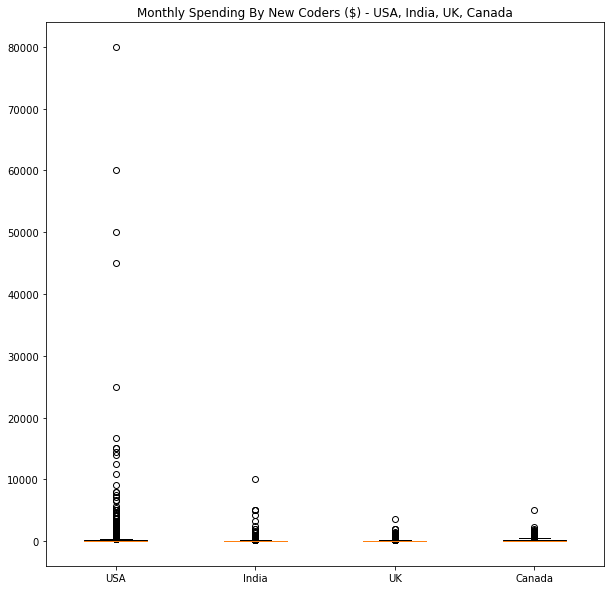

In [15]:
# generate boxplots to review the data closer
fig, ax = plt.subplots(nrows=1, figsize =(10,10))
fig = (20,20)

ax.boxplot([us_ms, india_ms, uk_ms, canada_ms])
ax.set_xticks([1, 2, 3, 4])
ax.set_xticklabels(['USA', 'India', 'UK', 'Canada'])

# set ylim to zoom in to areas we want to see better; trial and error to get good zooms
#ax.set_ylim(0,1000)

# title
plt.title('Monthly Spending By New Coders ($) - USA, India, UK, Canada')


plt.show()

In [16]:
# Remove outlier values for meaningful representation
# then rechart tables and boxplots

# 75% is 6th index in .descibe(): 'count, mean, std, min, .25, .50, .75..etc'
# 25% is 4th index in .descibe(): 'count, mean, std, min, .25, .50, .75..etc'
# IQR = Q3 - Q1
iqr_us = us_ms.describe()[6] - us_ms.describe()[4]
iqr_india = us_ms.describe()[6] - us_ms.describe()[4]
iqr_uk = us_ms.describe()[6] - us_ms.describe()[4]
iqr_canada = us_ms.describe()[6] - us_ms.describe()[4]

# identify and define top boundary of each segment
# topbound = Q3 + IQR
topbound_us = us_ms.describe()[6] + iqr_us
topbound_india = india_ms.describe()[6] + iqr_india
topbound_uk = uk_ms.describe()[6] + iqr_uk
topbound_canada = canada_ms.describe()[6] + iqr_canada

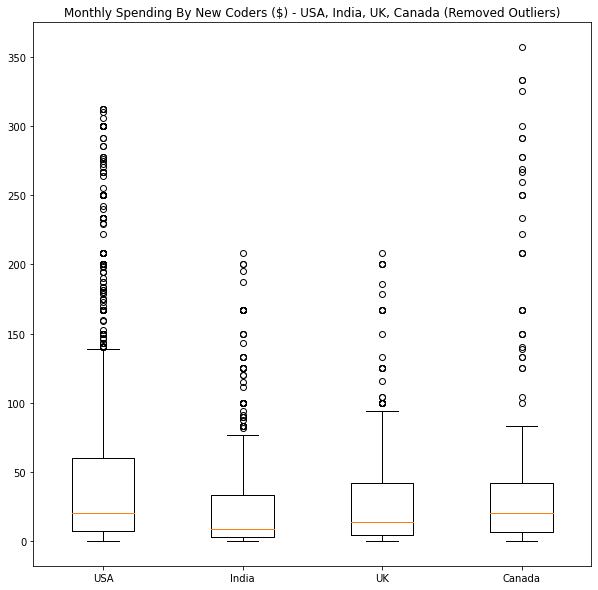

Average Monthly Spending By Country ($):
USA, India, UK, Canada
[47.57, 28.84, 32.6, 47.92]
--------------------------------------

Median Monthly Spending By Country ($):
USA, India, UK, Canada
[20.0, 8.58, 13.89, 20.0]


In [17]:
# Continuing from above cells for monthly spending:
# Also drop any rows where spending = defined outlier values
# Here, we create 4 separate segments and eliminate outliers accordingly
# Alernatively way which is more simple is to simply define outlier values to apply
# to the unsegmented 'mthly_spending' dataset before further segment using groupby, 
us_ms_new = us_ms[us_ms < topbound_us]
india_ms_new = india_ms[india_ms < topbound_india]
uk_ms_new = uk_ms[uk_ms < topbound_uk]
canada_ms_new = canada_ms[canada_ms < topbound_canada]

mean_new = []
for item in [us_ms_new, india_ms_new, uk_ms_new, canada_ms_new]:
    mean = round(item.mean(), 2)
    mean_new.append(mean)
    
median_new = []
for item in [us_ms_new, india_ms_new, uk_ms_new, canada_ms_new]:
    median = round(item.median(), 2)
    median_new.append(median)

# generate new boxplots to review the revised data
fig, ax = plt.subplots(nrows=1, figsize =(10,10))
fig = (20,20)

ax.boxplot([us_ms_new, india_ms_new, uk_ms_new, canada_ms_new])
ax.set_xticks([1, 2, 3, 4])
ax.set_xticklabels(['USA', 'India', 'UK', 'Canada'])

# title
plt.title('Monthly Spending By New Coders ($) - USA, India, UK, Canada (Removed Outliers)')


plt.show()


# print revised mean and median
print('Average Monthly Spending By Country ($):')
print('USA, India, UK, Canada')
print(mean_new)
print('--------------------------------------\n')
print('Median Monthly Spending By Country ($):')
print('USA, India, UK, Canada')
print(median_new)

#### Findings (Dealing With Extreme Outliers):

Based on the below findings, it would appear the top 2 countries by average monthly spendings would be **Canada, USA**. 

We also noted that the most extreme outliers are in the USA, which may represent a lucruative source for marketing to a certain segment of rich people.

**Average (Mean) Monthly Spending By Country ($) - Removed Outliers:**
- Canada: \$47.92
- USA: \$47.57
- UK: \$32.60
- India: \$28.84

**Median Monthly Spending By Country ($) - Removed Outliers:**
- Canada: \$20.00
- USA: \$20.00
- UK: \$13.89
- India: \$8.58

## 7) Choosing The Two Best Markets

We can also consider other factors in analysing the best markets to market to, such as number of potential customers in each country.

In [18]:
# looking for the number of customers in dataset before eliminating outliers
print('Number of potential customers from new coders in dataset before eliminating outliers')
print('------------------------------------------------------------------------------------')
print('USA:', us_ms.count())
print('India:', india_ms.count())
print('UK:', uk_ms.count())
print('Canada', canada_ms.count())

Number of potential customers from new coders in dataset before eliminating outliers
------------------------------------------------------------------------------------
USA: 3143
India: 526
UK: 367
Canada 303


#### Findings (Choosing The Two Best Markets):

- Using this metric **'Number of potential customers'**, we can see that **USA dominates by far**, followed by India, however India has a lower mean and median in terms of monthly spending, while **Canada** is more balanced in terms of both spending power and number of potential customers.

- As such for a planned marketing strategy where multiple countries are targeted, we suggest the advertising budget to be weighted more heavily towards the USA. Other countries can be a lucruative source of revenue as well, as long as the potential revenue gained is more than potential cost (or marginal revenue > marginal cost).

- Another reason is that our service is relating to offering educational courses, which we can scale easily in terms of geographical regions at lower cost, depending on the details of the operations.

- As such, details in synergies and operations should be further discussed with the marketing team to attempt a more optimal solution.

## 8) Conclusion

#### Overall findings:

- In this project, we analyzed survey data from new coders to find the best two markets to advertise in. The only solid conclusion we reached is that the **US would be a good market to advertise in in terms of both potential customers and spending powers.**

- For the second best market, it wasn't clear-cut what to choose although **Canada could be a good choice in terms of balancing between both spending power and number of potential customers.** We suggest to collaborate by sending the results to the marketing team to leverage on their domain knowledge to attempt a more optimal solution.

#### Potential areas for further analysis and improve presentation:
- Finding other criteria for choosing the best market
- Analysing other data sets
- Improve style and presentation of notebook
